Here, we use SoftImputer_ALS to obtain a rough solution with max_iteration = 150, then SoftImpute_SVD use the solution as warm start and then continue running 200 iterations. Due the complexity of implementation, I run another SoftImputer_ALS (same setting) 350 iterations. The y-axis is the relative objective, i.e., (the current objective - minimal objective)/ minimal objective

In [1]:
from Methods import *
X = generate_X(m=2000, n=1500, r=120, prop=0.5, random_state=1)
X += np.random.normal(scale=1, size=(2000, 1500))

In [14]:
SoftImputer_ALS = SoftImpute_ALS_subspace_dense(
    X, Lambda=300, r=50, sc='variable')
SoftImputer_ALS.matrix_completion(
    rvar_eps=1e-7, robj_eps=1e-7, max_iter=150)
warm_start = als_svd_data(
    SoftImputer_ALS.U, SoftImputer_ALS.Dsq, SoftImputer_ALS.V)

Algorithm start!
iteration: 150
relative objective and variable change: 2.1356809497811465e-06 7.5596151924535815e-06


In [17]:
SoftImputer_SVD = SoftImpute_SVD_dense(X, Lambda=300, r=50, sc='variable',warm_start=warm_start)
SoftImputer_SVD.matrix_completion(
    rvar_eps=1e-11, robj_eps=1e-11, max_iter=200)

iteration: 200
relative objective and variable change: 3.5552740088420827e-07 1.0895240532060901e-06


In [21]:
SoftImputer_ALS2 = SoftImpute_ALS_subspace_dense(
    X, Lambda=300, r=50, sc='variable')
SoftImputer_ALS2.matrix_completion(
    rvar_eps=1e-11, robj_eps=1e-11, max_iter=350)


Algorithm start!
iteration: 350
relative objective and variable change: 1.9579724531745046e-07 3.4915102268554027e-07


<IPython.core.display.Javascript object>


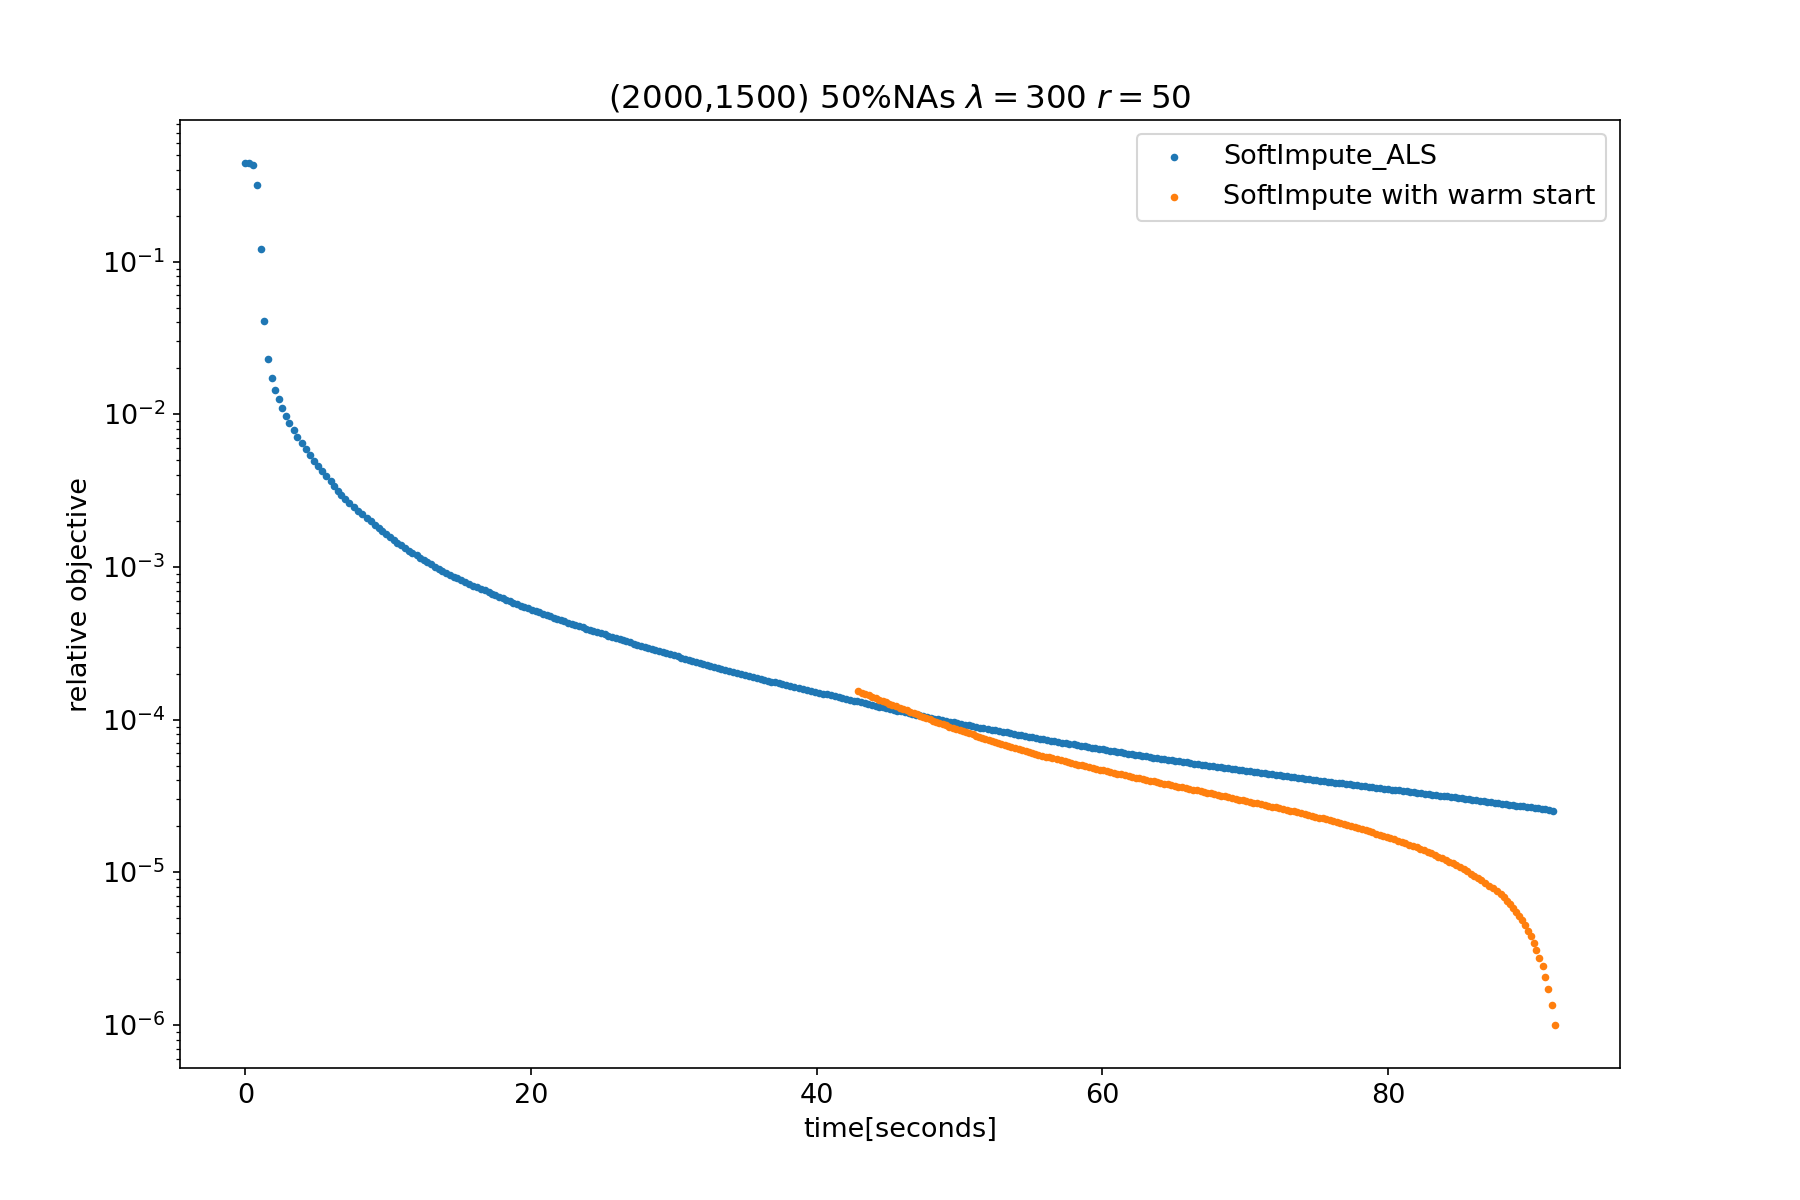

In [49]:
import matplotlib.pyplot as plt
%matplotlib notebook
base_error = SoftImputer_SVD.obj_list[-1]*(1-1e-6)
plt.scatter(SoftImputer_ALS2.running_time, (np.array(
    SoftImputer_ALS2.obj_list)-base_error)/base_error, label='SoftImpute_ALS', s=7)
plt.yscale('log')

time = SoftImputer_ALS.running_time[-1]
obj_list = SoftImputer_SVD.obj_list
running_time = [SoftImputer_SVD.running_time[i] + time for i in range(len(SoftImputer_SVD.running_time))]
plt.scatter(running_time,(np.array(
   obj_list)-base_error)/base_error,label='SoftImpute with warm start',s=7)
plt.legend()
plt.rcParams.update({'font.size': 13})
plt.xlabel("time[seconds]")
plt.ylabel('relative objective')
plt.title('(2000,1500) 50%NAs $\lambda=300$ $r=50$')
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.subplots_adjust(top=0.9,left=0.1)
plt.show()
plt.savefig('warm_start.png',dpi=300)